In [106]:
import pandas as pd
from DG import get_prices_df
from ag_datagenic_rest_client import DataGenic
d = DataGenic.create_from_environment()
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tshistory.api import timeseries

C:\Users\syedahmad\AppData\Local\Temp\ipykernel_27640\3441084466.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [107]:
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [46]:
gdm = {
    2015:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2015M12',
    2016:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2016M12',
    2017:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2017M12',
    2018:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2018M12',
    2019:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2019M12',
    2020:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2020M12',
    2021:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2021M12',
    2022:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2022M12',
    2023:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2023M12',
    2024:'model://ICE_BRENT/EU.OIL.NSEA.ICE.BRENT.FUT.2024M12',
}

In [47]:
x = get_prices_df(gdm, dt(2015,1,1))
desc = x[x.columns[::-1]]

In [48]:
diff = desc.diff(axis=1)

In [52]:
diff.drop(columns=2024, inplace=True)

In [76]:
annual_decreddec = []
for year in diff.columns:
    # print(diff[year].loc[f'{year}'].reset_index().drop(columns='Time'))
    annual_decreddec.append(diff[year].loc[f'{year}'].reset_index().drop(columns='Time'))
reddec = pd.concat(annual_decreddec, axis=1)

In [99]:
ts_decreddec = []
for year in diff.columns:
    # print(diff[year].loc[f'{year}'])
    ts_decreddec.append(diff[year].loc[f'{year}'])
reddec_ts = pd.concat(ts_decreddec)

In [131]:
stocks = tsa.get('crude.iea.oecd_total.commercial_stocks.kt.monthly')
kpler_stocks = tsa.get('crude.kpler.oecd_total.commercial_stocks.mb.daily').resample('MS').mean()
dxy = tsa.get('macro.dxy_index.daily')

<Axes: >

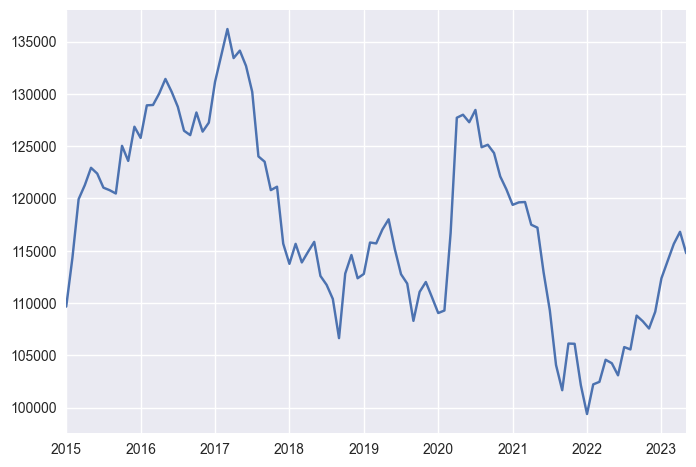

In [111]:
stocks.loc['2015':].plot()

<Axes: >

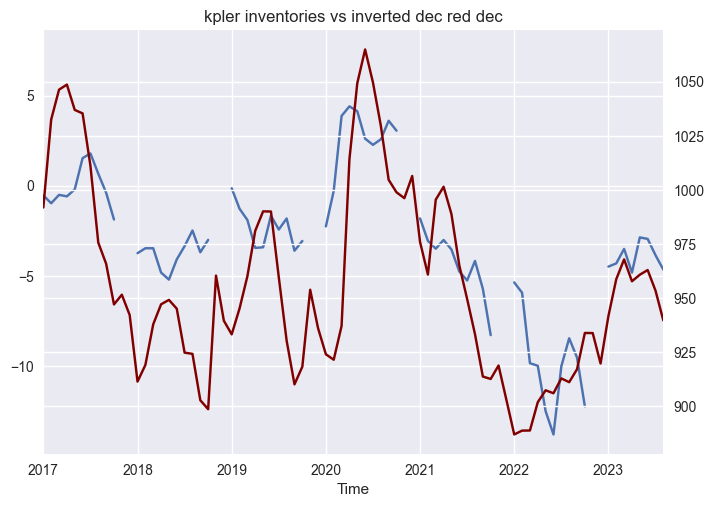

In [137]:
ax1 = (reddec_ts.resample('MS').mean()*-1).plot(title = 'kpler inventories vs inverted dec red dec')
ax2 = ax1.twinx()
# stocks.loc['2015':].plot(ax=ax2, color='maroon')
kpler_stocks.plot(ax=ax2, color='maroon')

<Axes: >

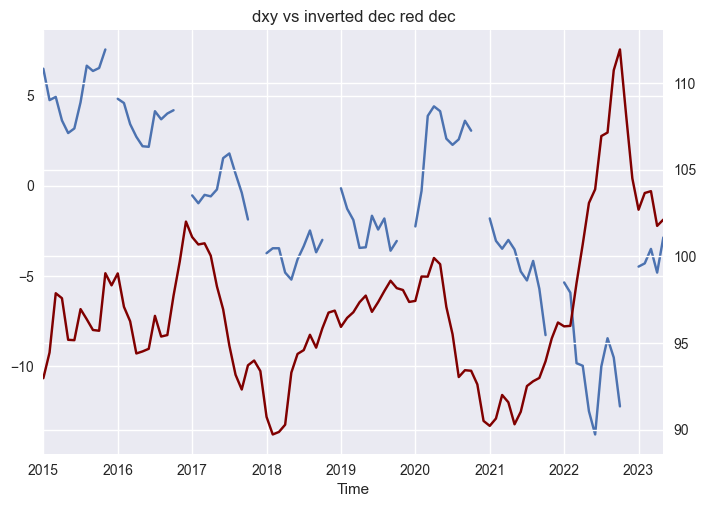

In [141]:
ax1 = (reddec_ts.resample('MS').mean()*-1).plot(title = 'dxy vs inverted dec red dec')
ax2 = ax1.twinx()
dxy.resample('MS').mean().loc['2015':].plot(ax=ax2, color='maroon')

<Axes: >

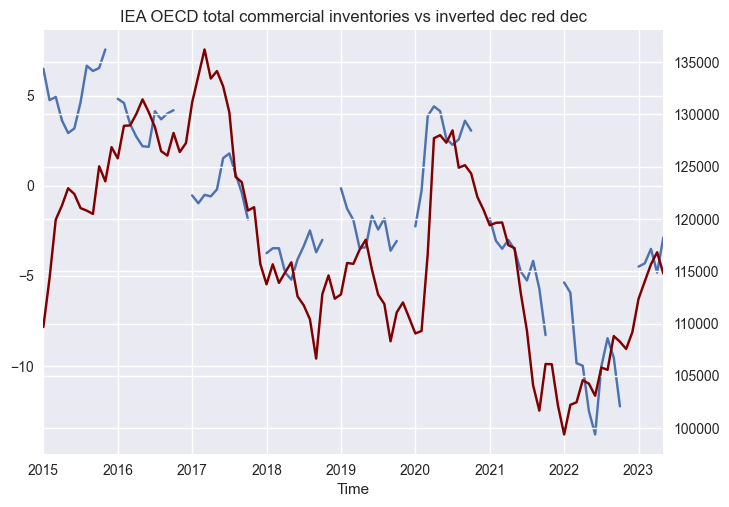

In [138]:
ax1 = (reddec_ts.resample('MS').mean()*-1).plot(title = 'IEA OECD total commercial inventories vs inverted dec red dec')
ax2 = ax1.twinx()
stocks.loc['2015':].plot(ax=ax2, color='maroon')

<Axes: title={'center': 'Dec / Red Dec Yearly'}>

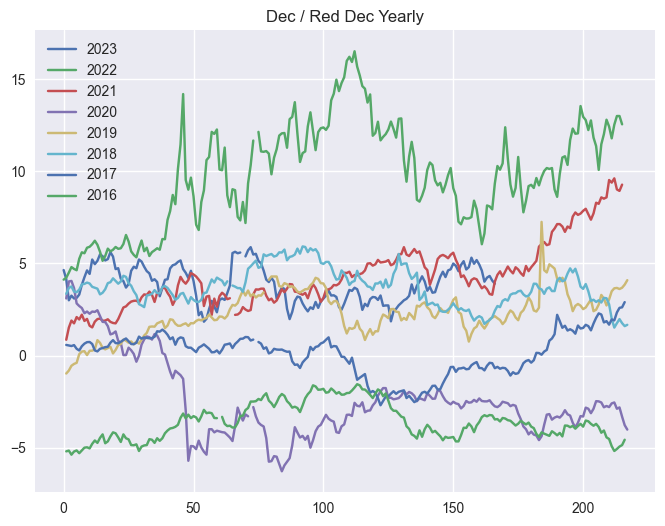

In [130]:
reddec.drop(columns=2015).plot(figsize=(8,6), title=('Dec / Red Dec Yearly'))

In [97]:
diff.com

2023  2022  2021  2020  2019  2018  2017  2016  2015
Time                                                            
2016-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2016-01-04   NaN   NaN -0.36 -0.98 -1.52 -2.22 -3.63 -5.19   NaN
2016-01-05   NaN   NaN -0.36 -0.98 -1.55 -2.18 -3.55 -5.15   NaN
2016-01-06   NaN   NaN -0.36 -0.98 -1.59 -2.31 -3.67 -5.37   NaN
2016-01-07   NaN   NaN -0.36 -0.98 -1.60 -2.31 -3.65 -5.20   NaN
...          ...   ...   ...   ...   ...   ...   ...   ...   ...
2016-12-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2016-12-27   NaN -0.68 -0.66 -0.56 -0.36  0.19  0.85   NaN   NaN
2016-12-28   NaN -0.68 -0.66 -0.58 -0.34  0.21  0.81   NaN   NaN
2016-12-29   NaN -0.68 -0.66 -0.58 -0.36  0.17  0.79   NaN   NaN
2016-12-30   NaN -0.68 -0.66 -0.61 -0.33  0.22  0.75   NaN   NaN

[261 rows x 9 columns]

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='Time'>, <Axes: xlabel='Time'>], dtype=object)

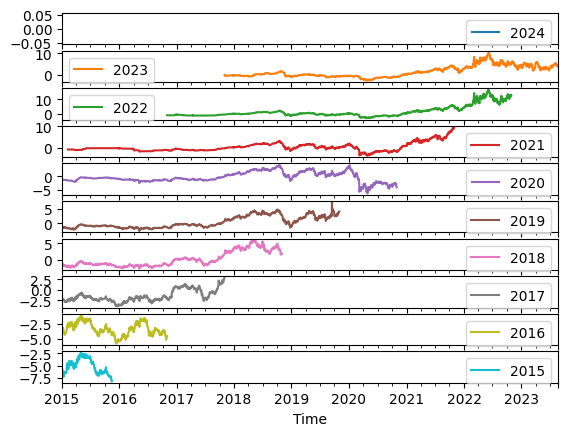

In [50]:
diff.plot(subplots=True)

In [17]:
dec_list = []
for year, model in gdm.items():
    df = d.get_time_series(model_url=model, from_date=dt(year,1,1), to_date=dt(year,12,31))
    dec_list.append(df)

In [11]:
dec_list

[            PRICE
 Time             
 2015-01-01    NaN
 2015-01-02    NaN
 2015-01-05    NaN
 2015-01-06    NaN
 2015-01-07    NaN
 ...           ...
 2015-12-25    NaN
 2015-12-28    NaN
 2015-12-29    NaN
 2015-12-30    NaN
 2015-12-31    NaN
 
 [261 rows x 1 columns],
             PRICE
 Time             
 2016-01-01    NaN
 2016-01-04    NaN
 2016-01-05    NaN
 2016-01-06    NaN
 2016-01-07    NaN
 ...           ...
 2016-12-26    NaN
 2016-12-27  59.66
 2016-12-28  59.91
 2016-12-29  60.02
 2016-12-30  60.04
 
 [261 rows x 1 columns],
             PRICE
 Time             
 2017-01-02    NaN
 2017-01-03  59.25
 2017-01-04  60.15
 2017-01-05  60.61
 2017-01-06  60.72
 ...           ...
 2017-12-25    NaN
 2017-12-26  57.80
 2017-12-27  57.92
 2017-12-28  58.03
 2017-12-29  57.47
 
 [260 rows x 1 columns],
             PRICE
 Time             
 2018-01-01    NaN
 2018-01-02  57.50
 2018-01-03  57.58
 2018-01-04  57.43
 2018-01-05  57.65
 ...           ...
 2018-12-25    NaN
 2018-1